In [1]:
from PIL import Image, ImageDraw
import torch
import os
from torchvision import transforms

In [2]:
# Device configuration
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = torch.device('cpu')
print(device)

cpu


In [3]:
project_folder = os.path.expanduser("~/02456_Temp")
dataset_path = os.path.join(project_folder, "Dataset")
models_path = os.path.join(project_folder, "Models")
project_20_data_path = os.path.join(dataset_path, "project_20_data")

In [4]:
PATH = os.path.join(models_path,"FullModel_BeerCans_1-epochs_6-minutes_20211129-162953.pth")

In [5]:
model = torch.load(PATH)
model.to(device)
print("Model loaded")

Model loaded


In [6]:
frame = "frame_002008"
image_path = os.path.join(project_20_data_path,"video1/video_frames/"+frame+".PNG")
example_image = Image.open(image_path)

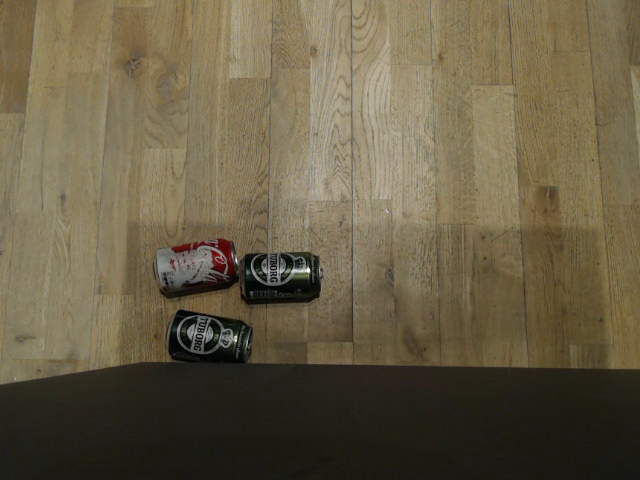

In [7]:
example_image

In [8]:
img = Image.open(image_path).convert("RGB")
convert_tensor = transforms.ToTensor()
img = convert_tensor(img)
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

/home/steven/anaconda3/envs/deep_learning/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
img

tensor([[[0.3961, 0.4078, 0.4000,  ..., 0.3922, 0.4118, 0.3922],
         [0.4039, 0.3490, 0.3451,  ..., 0.3961, 0.4118, 0.4000],
         [0.4078, 0.3294, 0.3490,  ..., 0.3922, 0.4078, 0.4000],
         ...,
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902],
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902],
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902]],

        [[0.3490, 0.3608, 0.3333,  ..., 0.3373, 0.3569, 0.3373],
         [0.3569, 0.3020, 0.2784,  ..., 0.3412, 0.3569, 0.3451],
         [0.3412, 0.2627, 0.2824,  ..., 0.3373, 0.3529, 0.3451],
         ...,
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902],
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902],
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902]],

        [[0.2392, 0.2510, 0.2392,  ..., 0.2235, 0.2431, 0.2235],
         [0.2471, 0.1922, 0.1843,  ..., 0.2275, 0.2431, 0.2314],
         [0.2392, 0.1608, 0.1647,  ..., 0.2235, 0.2392, 0.

In [10]:
prediction

[{'boxes': tensor([[160.8124, 311.5820, 255.2783, 367.2284],
          [237.3396, 248.9926, 324.8911, 310.0246],
          [143.0926, 234.7675, 240.9816, 297.8589],
          [148.5974, 234.9059, 241.7157, 295.7972]]),
  'labels': tensor([2, 2, 1, 2]),
  'scores': tensor([0.9935, 0.9925, 0.9720, 0.1841])}]

In [11]:
# creating new Image object
color_map = ["","red","green"]

predicted_img = Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())
# create rectangle image
img1 = ImageDraw.Draw(predicted_img)  


for pred in prediction:
    boxes = pred["boxes"]
    labels = pred["labels"]
    index = 0
    for box in boxes: 
        shape = [(box[0], box[1]), (box[2], box[3])]
        img1.rectangle(shape, outline =color_map[labels[index].item()])
        index += 1 

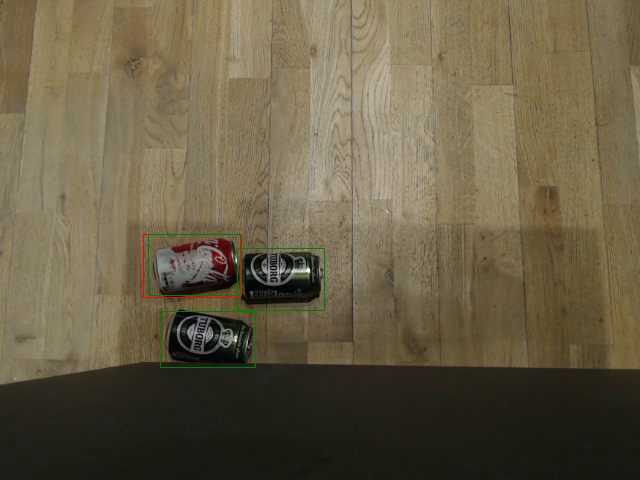

In [12]:
predicted_img

In [13]:
import requests
from io import BytesIO

urls = ("https://fastly.4sqi.net/img/general/600x600/21698223_BRLnqg0xhszZByqId8Nt0tV7SOU8H_9Q3uEn3DU5vOw.jpg",
        "https://docplayer.dk/docs-images/44/14153021/images/page_3.jpg",
        "https://www.gbottleshop.com/wp-content/uploads/TUBORG-BEER-RED-0.5L-CAN-1.jpg",
        "https://cdn.markedsforing.dk/app/uploads/20200611051118/tuborg_top_0.jpg",
        "https://c8.alamy.com/comp/ANDD50/quice-and-salad-tuborg-beer-denmark-ANDD50.jpg",
        "https://static.turbosquid.com/Preview/2019/07/24__05_50_10/1.jpg7910987F-7391-4363-9D9A-E3DCA21C21A6Large.jpg",
        "https://image.isu.pub/120629180608-13d43c3d6bc14a459dce1baf110d50dd/jpg/page_4.jpg")
images_url = []
images_processed = []
predictions = []
for url in urls:
    response = requests.get(url)
    images_url.append(Image.open(BytesIO(response.content)))

In [14]:
scale_factor = 2
for img in images_url: 
    width, height = img.size
    img = img.resize((int(width/scale_factor),int(height/scale_factor)))
    img = convert_tensor(img)
    images_processed.append(img)
    model.eval()
    with torch.no_grad():
        prediction = model([img.to(device)])
        predictions.append(prediction)

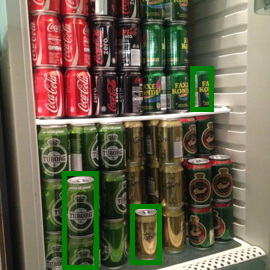

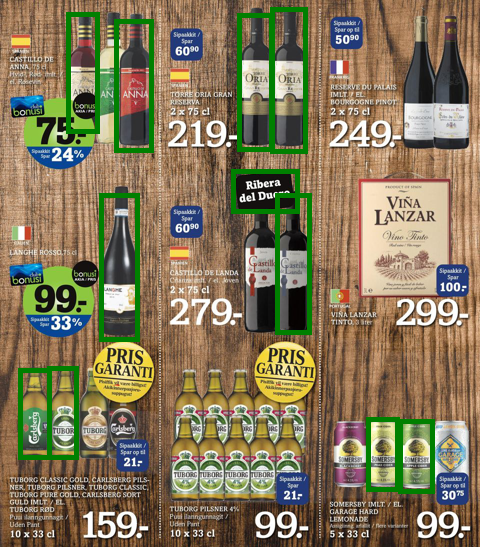

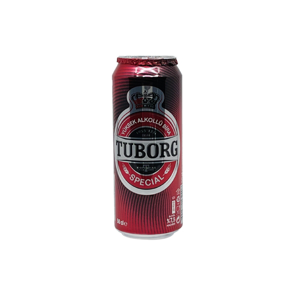

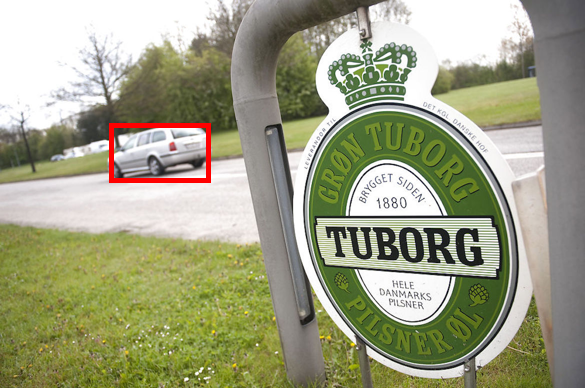

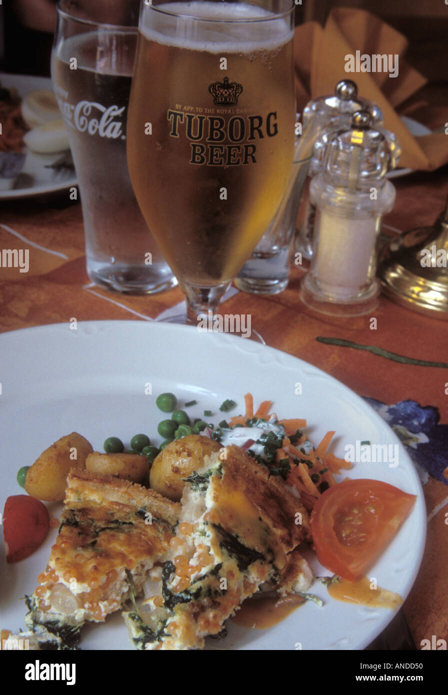

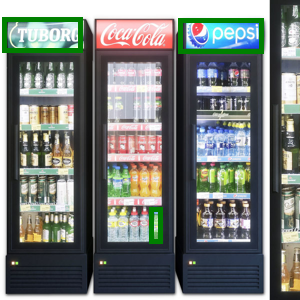

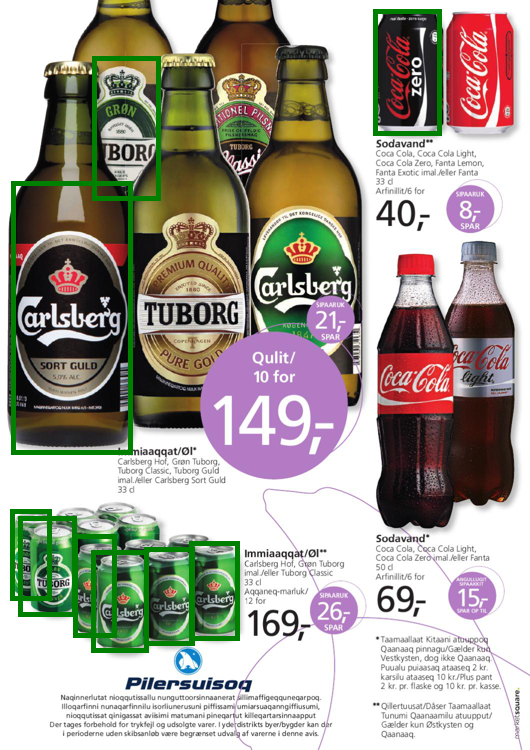

In [17]:
# creating new Image object
color_map = ["","red","green"]
image_index = 0

for img in images_processed:
    predicted_img = Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())
    # create rectangle image
    img1 = ImageDraw.Draw(predicted_img)  

    for pred in predictions[image_index]:
        boxes = pred["boxes"]
        labels = pred["labels"]
        scores = pred["scores"]
        index = 0
        for box in boxes: 
            if scores[index].item() > 0.80: 
                shape = [(box[0], box[1]), (box[2], box[3])]
                img1.rectangle(shape, outline =color_map[labels[index].item()],width=5)
                index += 1 
    display(predicted_img)
    image_index += 1